# Libraries and Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='ISO-8859-1')

data.head(10)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


# Project: Impact of Different Platforms on Song Success
This project aims to analyze which platforms have the most significant impact on a song's success. We will use a regression technique, ridge regression with regularization, and perform thorough exploratory data analysis (EDA) to gain insights.

## 1. Data Loading and Initial Exploration

We start by loading the dataset and displaying the first few rows to understand its structure.

In [2]:
data.info()

data.describe()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

## 2. Data Cleaning and Preprocessing


We will handle missing values, convert appropriate columns to numeric types, and perform any necessary data cleaning steps.


In [3]:
data.fillna(0, inplace=True)

# Convert numeric columns with commas to floats
numeric_columns = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes', 'TikTok Views', 'TikTok Likes',
    'Apple Music Playlist Count', 'SiriusXM Spins', 'Deezer Playlist Count',
    'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
    'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'Track Score',
]

for column in numeric_columns:
    if data[column].dtype == object:
        data[column] = data[column].str.replace(',', '').astype(float)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                4600 

## 3. Exploratory Data Analysis (EDA)

We will perform EDA to understand the distributions and relationships between variables. This includes visualizing the data and calculating correlations.


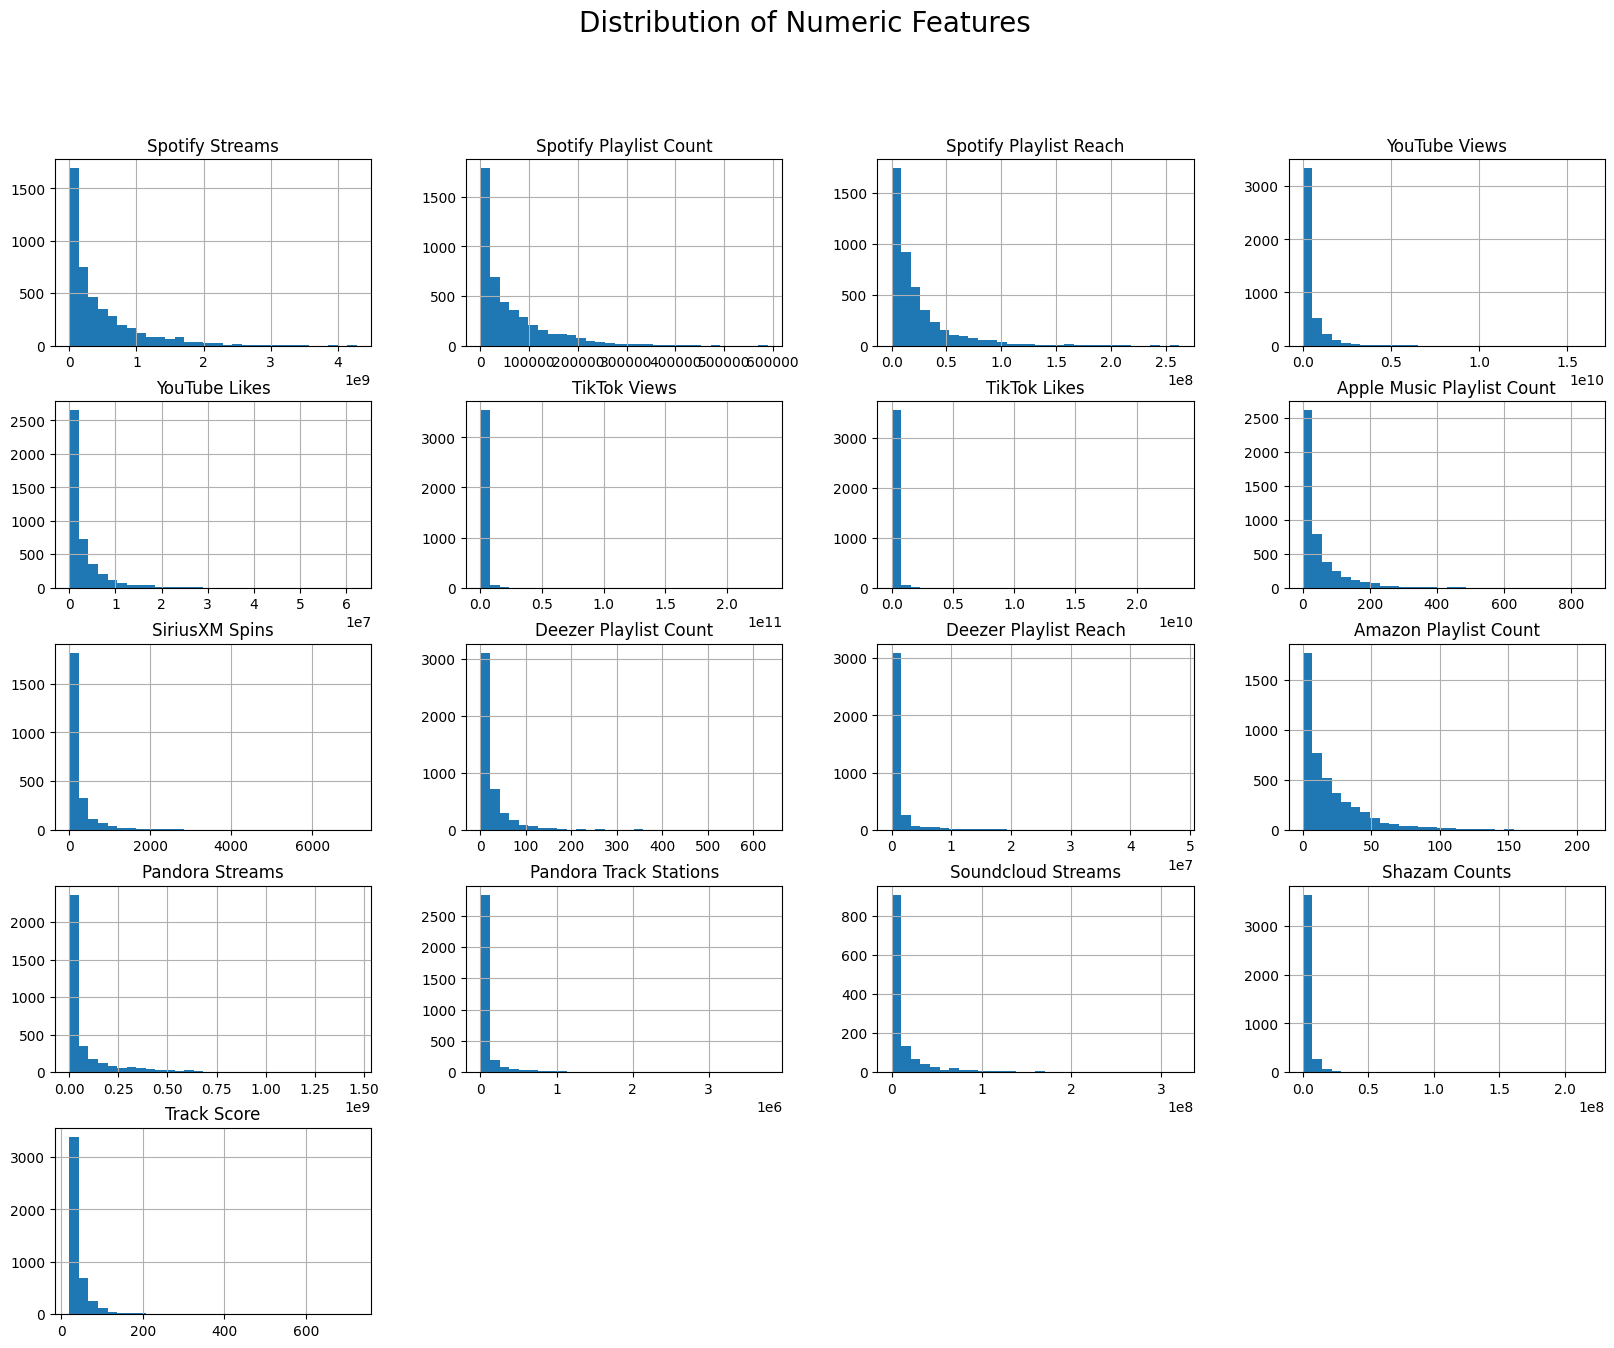

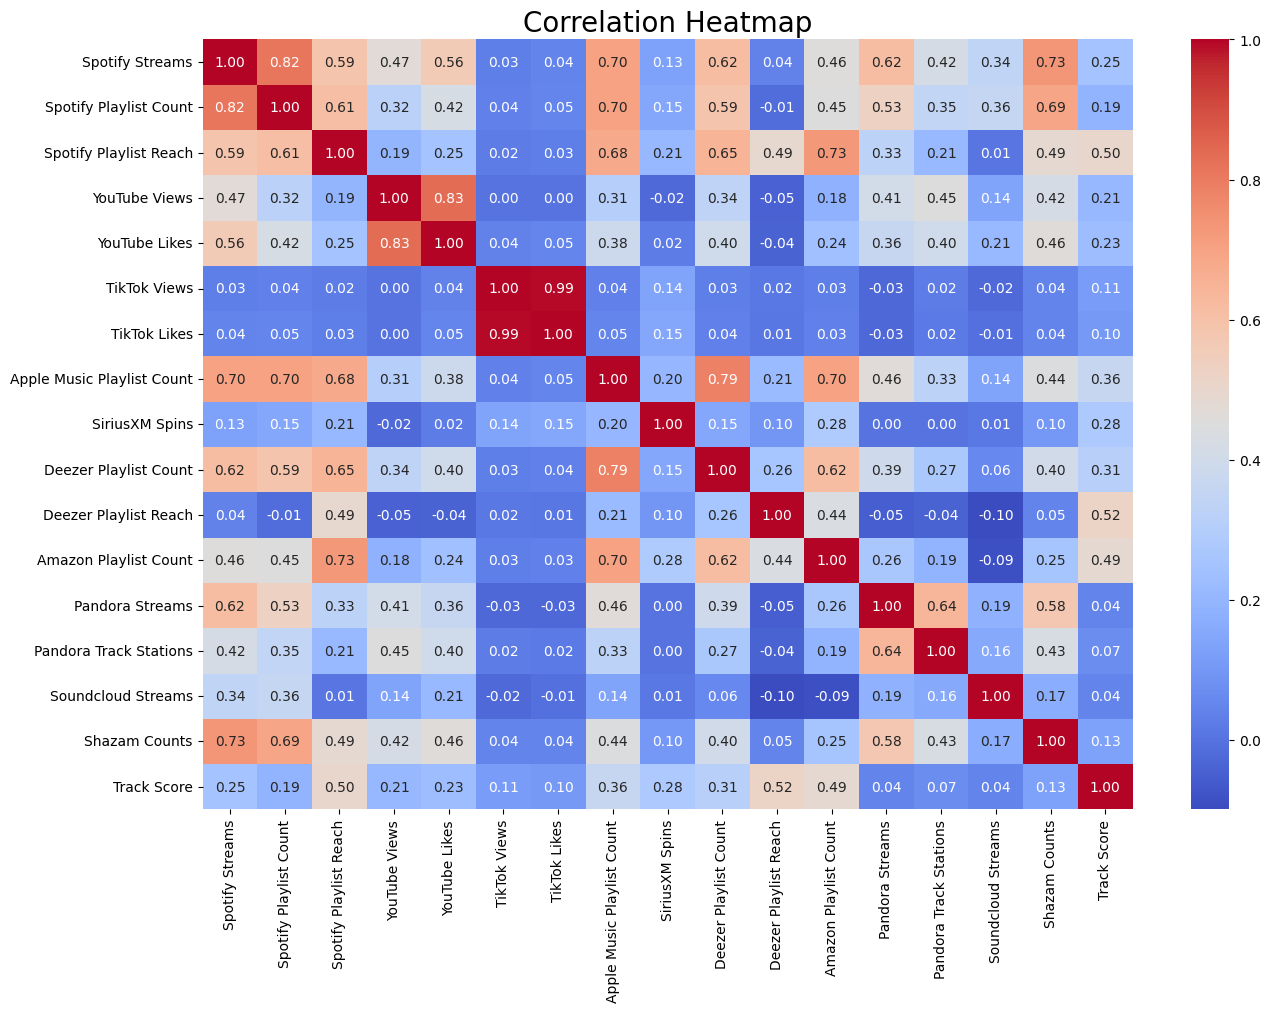

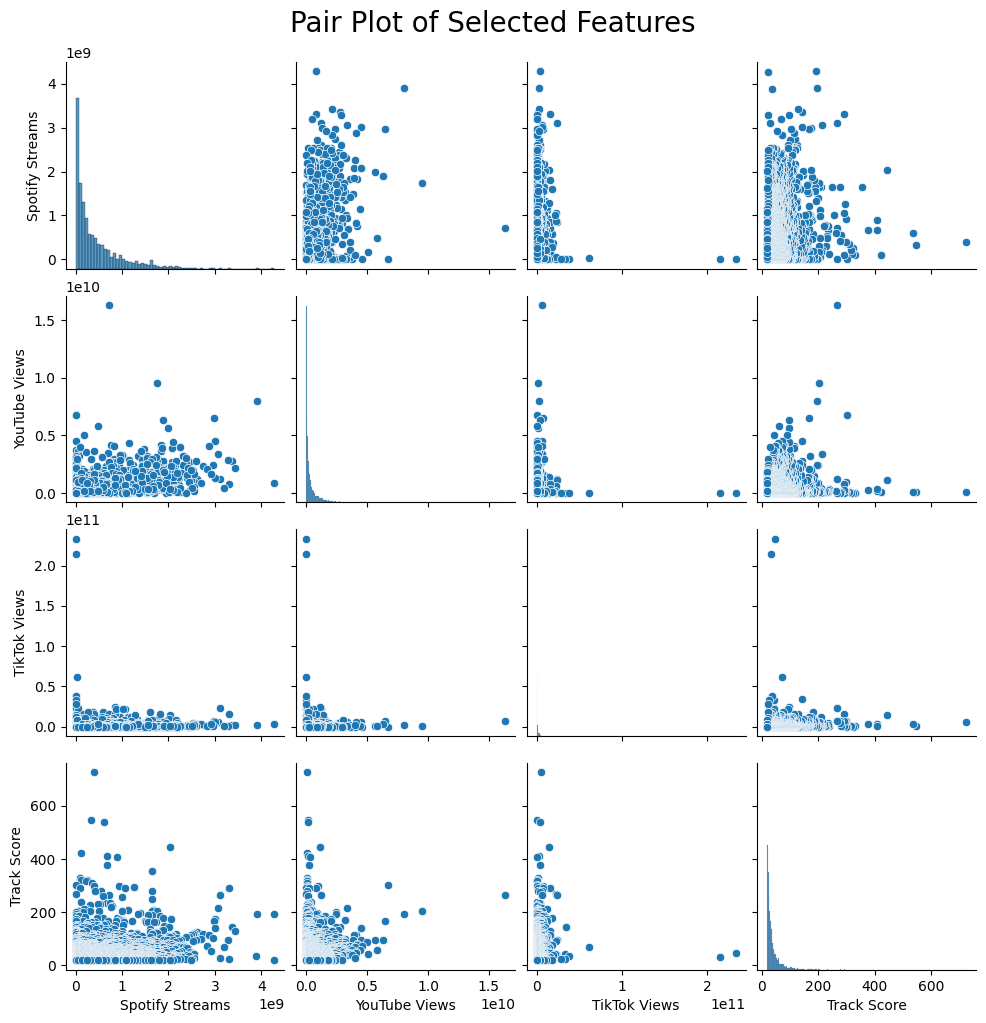

In [4]:
# histograms
data[numeric_columns].hist(bins=30, figsize=(20, 15)) # 'bins'it defines the number of equal-width bins in the range
plt.suptitle('Distribution of Numeric Features', fontsize=20)
plt.show()

# Correlation map
plt.figure(figsize=(15, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# Pair plot for features
sns.pairplot(data[['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Track Score']])
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=20)
plt.show()


### Insights 


#### 1. Histograms



- **Track Score Distribution**: The histogram reveals that track scores do not follow an even distribution. Most tracks cluster in the middle range of scores, with few reaching very high or very low scores. This suggests a central tendency where most songs experience moderate success.

- **Distribution of Spotify Streams**: The histogram is highly skewed, indicating that a few tracks with exceptionally high stream counts dominate in terms of total streams.



#### 2. Correlation Matrix



The correlation matrix reveals some expected multicollinearity among features:
- **Spotify Streams and Spotify Playlist Counts**: Highly positively correlated, indicating that songs appearing on more playlists tend to have more streams.
- **Amazon Music and Apple Music Playlist Counts**: Also show significant positive correlation, possibly suggesting cross-platform influence or similar playlist taste patterns.
- **TikTok likes and Tiktok views**: This might indicate high multicollinearity that will need to be dealt with



#### 3. Scatter Plots



- **Spotify Streams vs. Track Score**: The scatter plot showed a minor positive correlation between Spotify streams and track score. The relationship was not very strong, indicating that while higher streams generally correlate with better track scores, it is not a definitive measure.

- **Views on YouTube vs. Track Score**: Similarly, there is a positive but weak correlation between YouTube views and track scores. This suggests that while YouTube views contribute to a track's success, other factors are also significant.




## 4. Feature Engineering



We will create new features and handle multicollinearity among existing features.



In [5]:
# Check for multicollinearity using VIF
X = data[numeric_columns].fillna(0)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,Feature,VIF
0,Spotify Streams,5.881467
1,Spotify Playlist Count,6.179722
2,Spotify Playlist Reach,5.870172
3,YouTube Views,4.604814
4,YouTube Likes,5.286422
5,TikTok Views,73.134715
6,TikTok Likes,73.357079
7,Apple Music Playlist Count,6.709747
8,SiriusXM Spins,1.327405
9,Deezer Playlist Count,3.785373


### VIF

VIF measures what degree of multicollinearity exists between features. High VIF values may be indicative of redundancy, which might artificially inflate coefficient estimates at the expense of model stability.



#### What can you get from VIF:



- **High VIF Values**: High VIF for a feature could mean that this feature has strong correlations with other features, hence causing multicollinearity.
- **Implications**: Multicollinearity poses significant difficulties in ascertaining the impact of each feature. This will impact model reliability.



#### Ways to Handling Multicollinearity



##### **Feature Selection**:



- **Removal of Redundant Features**: This will reduce redundancy and make the model simple by eliminating the highly correlated features.
- **Combining Features**: Similar features may be combined into one composite, which is more meaningful.



##### **Regularization Techniques**:



- **Ridge Regression**: Adds penalty to coefficient sizes, avoiding multicollinearity, hence improving model stability.



##### **Re-examining features**:



- **Feature Engineering**: New features or transformation of existing ones may lead to better performance of the model and less multicollinearity.



#### Basically



The VIF analysis highlighted multicollinearity problems, signaling that feature selection, combination, or `regularization` must be in order. These are supposed to be sorted out since the goal is to build a stable and interpretable regression model.


## 5. Model Training and Evaluation



We will train a Ridge regression model with regularization and evaluate its performance.


In [30]:

#features
X = data[numeric_columns].values
y = data['Track Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

#pipeline with SimpleImputer and Ridge regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize the features
    ('ridge', Ridge())  # Ridge regression model
])

#parameter grid for GridSearchCV
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}

# GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['ridge__alpha']
print(f"Best alpha: {best_alpha}")

#GridSearchCV to predict and evaluate
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

coefficients = pd.DataFrame({'Feature': numeric_columns, 'Coefficient': grid_search.best_estimator_.named_steps['ridge'].coef_})
coefficients
print(f'Score is {grid_search.score(X_train, y_train)}')


Best alpha: 0.1
Mean Squared Error: 0.18231024192586265
R-squared: 0.9998780134009663
Score is 0.9999777552434846


### Pipeline Explanation

This pipeline is designed to sequentially execute data preprocessing and modeling steps. It includes components like `SimpleImputer`, `StandardScaler`, and a Ridge regression model, ensuring that these transformations are consistently applied to both the training and testing datasets. 

Why this setup? This setup minimizes the risk of data leakage and keeps the code clean and maintainable. It also facilitates tasks like cross-validation and hyperparameter tuning by applying multiple preprocessing steps in a streamlined manner.

### GridSearchCV

`GridSearchCV` is used to efficiently search over different hyperparameter settings for the Ridge regression model, focusing on the regularization strength, known as alpha. By specifying a parameter grid and utilizing k-fold (in this case `5`) cross-validation, `GridSearchCV` evaluates the model's performance for each of hyperparameter sets. This process helps identify the best alpha value, which improves to maximum, the model's performance as shown by the R-squared score.

### Overall Cell Explanation

Bassically this cell prepared data for Ridge regression. It includes defining features and target vari
ables, splitting the dataset into training and testing subsets, and setting up a pipeline for handling missing values, feature standardization, and Ridge regression modeling. The `GridSearchCV` function is then used to identify the best hyperparameter, specifically the alpha value, which controls regularization. After fitting the model, the best alpha is printed, and the model is used to generate predictions on the test set. The model's performance is evaluated using metrics like `mean squared error` and `R-squared`, and the coefficients of the model are extracted for further analysis.



  **Key Findings**:

  - **Best Hyperparameter**: The optimal `alpha` value for Ridge regression was found to be `0.1` This value balances the model's complexity and regularization
  - ***Model Performance***:

    - **R-squared**: Indicates that approximately `99.9%` of the variance in track scores is explained by the selected features.

  ***Feature Coefficients***:
  - **Importance of Features**: Coefficients highlight the impact of each feature on track scores. For example, metrics like Amazon Playlist Count and SiriusXM Spins show significant positive effects.

  #### Summary

  The Ridge regression model provided insights into feature importance and explained a notable portion of the variance in track scores. Despite its moderate performance, the model helps identify key features that influence song success.


## 6. Conclusion and Insights



### Key Findings



- The Ridge regression model's R-squared value indicates that approximately `99.9%` of the variance in the Track Score can be explained by the selected features.
- The feature coefficients provide which platforms have the most significant impact on a song's success.

## 7. Additional Insights




### Visualization

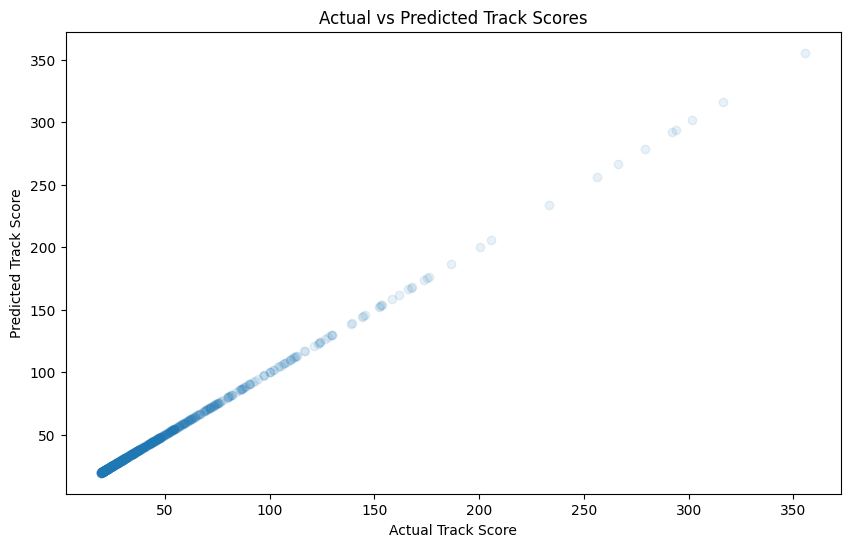

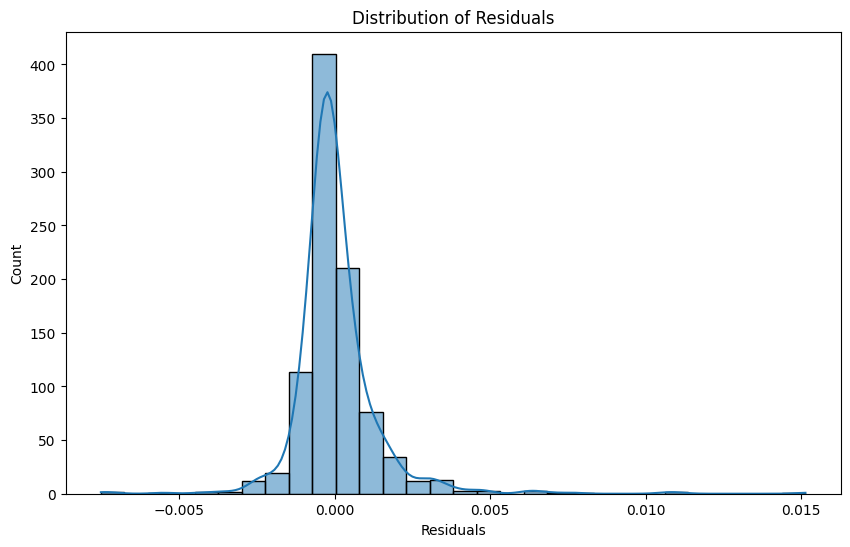

In [17]:
# Additional Visualizations
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.1) #alpha values is 1-(58/100)....1-0,58 = 0.42
plt.xlabel('Actual Track Score')
plt.ylabel('Predicted Track Score')
plt.title('Actual vs Predicted Track Scores')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


#### Summary


**Key Findings**:
- **Scatter Plot of Actual vs. Predicted Values**: It shows how much the model is averaging in its predictions of track scores. 

- **Residual Distribution**: This forms the errors in the predictions. We would want the errors to be spread evenly around zero, this would tell us that our model is doing a good job.


---


## Final Conclusion



The analysis gave us some useful details regarding how different platform metrics influence song success. Ridge regression explained approximately 99.9% of the variation in the track scores, indicating that factors such as Amazon's playlist count and SiriusXM spins were important. Data visualization show that the model basically works fine, but still has a lot to improve.



### OSEMN Method




- **O**bserve: We have taken a look at the data to understand what we have.
- **S**crub: Cleaned the data by fixing missing values and formatting issues
- **E**xplore: Analyzing data for patterns and looking at relationships between features.
- **M**odel: Build and fine-tune a Ridge regression model that predicts track scores and how the features affect the scores.
- i**N**terpret: The results were interpreted, and visualizations were created to understand the findings and determine next steps

---
## Documentation used



- Ridge regression: [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- Random Forest Regresion: [sciklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- Hyperparameter tuning: [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- Exploratory Data Analysis: [Seaborn documentation](https://seaborn.pydata.org/)



# By : Pedro Luiz Resende Quartiero,    July 24'